In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('financial_sentiment_data.csv')

In [3]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
df.tail()

,Sentence,Sentiment
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral
5841,HELSINKI AFX - KCI Konecranes said it has won ...,positive


In [5]:
df.shape

(5842, 2)

# DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
df['Sentiment']=encoder.fit_transform(df['Sentiment'])

In [9]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1


In [10]:
#Check for missing values
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [11]:
# drop duplicate rows based on the 'text' column
df = df.drop_duplicates(subset='Sentence', keep=False)

# print the new number of rows in the dataset
print(len(df))

4802


In [12]:
#Check for duplicates values
df.duplicated().sum()

0

In [13]:
df.shape

(4802, 2)

# EDA

In [14]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1


In [15]:
df['Sentiment'].value_counts()

1    2604
2    1852
0     346
Name: Sentiment, dtype: int64

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

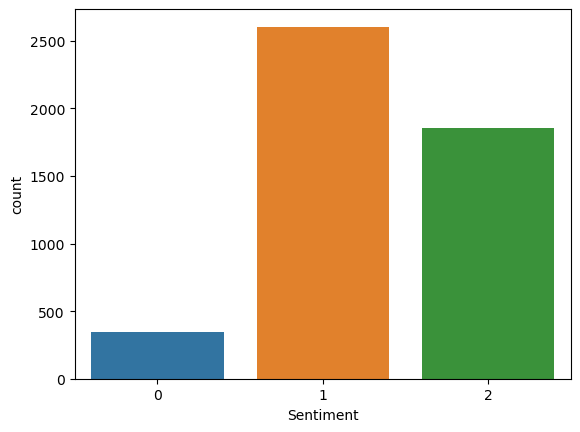

In [16]:
import seaborn as sns
sns.countplot(df.Sentiment)

In [17]:
#So as we can see that the data is imbalanced .We have neutral sentiment more than negative and positive

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
df['num_characters']=df['Sentence'].apply(len)

In [21]:
df.head()

,Sentence,Sentiment,num_characters
0,The GeoSolutions technology will leverage Bene...,2,218
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,55
2,"For the last quarter of 2010 , Componenta 's n...",2,193
3,According to the Finnish-Russian Chamber of Co...,1,128
4,The Swedish buyout firm has sold its remaining...,1,135


In [22]:
#Num of words
df['num_words']=df['Sentence'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,Sentence,Sentiment,num_characters,num_words
0,The GeoSolutions technology will leverage Bene...,2,218,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,55,15
2,"For the last quarter of 2010 , Componenta 's n...",2,193,39
3,According to the Finnish-Russian Chamber of Co...,1,128,20
4,The Swedish buyout firm has sold its remaining...,1,135,23


In [24]:
df['num_sentence']=df['Sentence'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,Sentence,Sentiment,num_characters,num_words,num_sentence
0,The GeoSolutions technology will leverage Bene...,2,218,32,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,55,15,1
2,"For the last quarter of 2010 , Componenta 's n...",2,193,39,1
3,According to the Finnish-Russian Chamber of Co...,1,128,20,1
4,The Swedish buyout firm has sold its remaining...,1,135,23,1


In [26]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4802.000000,4802.000000,4802.000000
mean,115.030404,21.034361,1.085381
std,56.597170,10.023689,0.362532
min,9.000000,2.000000,1.000000
25%,70.000000,13.000000,1.000000
50%,104.500000,19.000000,1.000000
75%,149.000000,27.000000,1.000000
max,315.000000,81.000000,5.000000


In [27]:
#For negative
df[df['Sentiment']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,346.000000,346.000000,346.000000
mean,75.109827,15.115607,1.358382
std,29.615205,6.791592,0.658414
min,12.000000,3.000000,1.000000
25%,56.000000,10.000000,1.000000
50%,68.000000,13.000000,1.000000
75%,94.750000,19.000000,2.000000
max,140.000000,34.000000,5.000000


In [28]:
#For neutral
df[df['Sentiment']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,2604.000000,2604.000000,2604.000000
mean,122.378264,21.833333,1.027650
std,57.071329,9.939921,0.201806
min,9.000000,2.000000,1.000000
25%,78.000000,14.000000,1.000000
50%,113.000000,20.000000,1.000000
75%,158.000000,27.250000,1.000000
max,315.000000,81.000000,4.000000


In [29]:
#For positive
df[df['Sentiment']==2][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1852.000000,1852.000000,1852.000000
mean,112.157127,21.016739,1.115551
std,56.412443,10.277050,0.428125
min,10.000000,3.000000,1.000000
25%,67.000000,13.000000,1.000000
50%,100.000000,19.000000,1.000000
75%,145.250000,28.000000,1.000000
max,298.000000,57.000000,5.000000


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

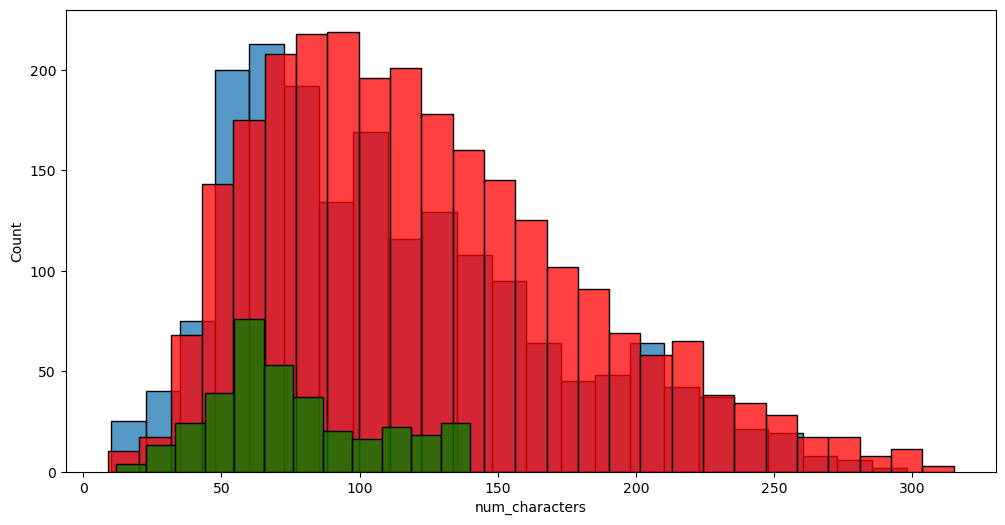

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Sentiment']==2]['num_characters'])
sns.histplot(df[df['Sentiment']==1]['num_characters'],color='red')
sns.histplot(df[df['Sentiment']==0]['num_characters'],color='green')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

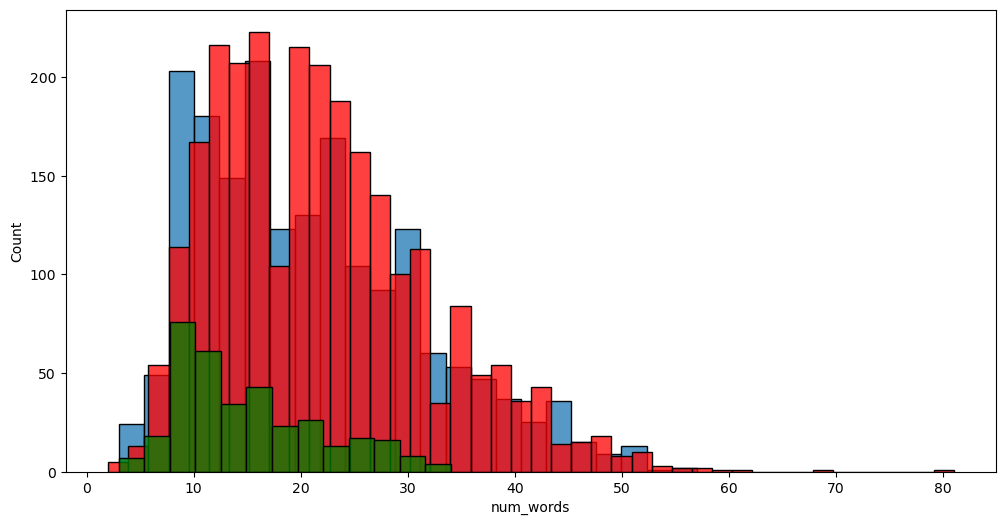

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Sentiment']==2]['num_words'])
sns.histplot(df[df['Sentiment']==1]['num_words'],color='red')
sns.histplot(df[df['Sentiment']==0]['num_words'],color='green')

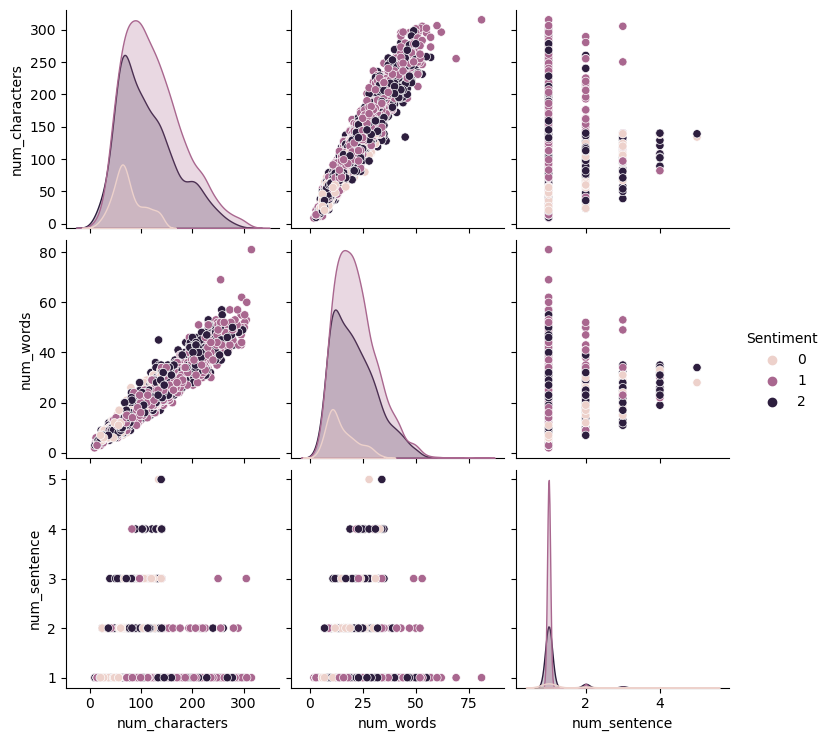

In [33]:
sns.pairplot(df,hue='Sentiment')

<AxesSubplot:>

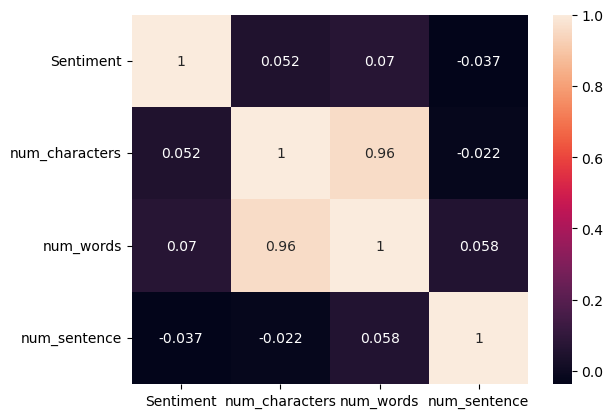

In [34]:
sns.heatmap(df.corr(),annot=True)

# TEXT PREPROCESSING

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [38]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

In [39]:
 df['transformed_text']=df['Sentence'].apply(transform_text)

In [40]:
df.head()

,Sentence,Sentiment,num_characters,num_words,num_sentence,transformed_text
0,The GeoSolutions technology will leverage Bene...,2,218,32,1,geosolut technolog leverag benefon gp solut pr...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,55,15,1,esi low bk real possibl
2,"For the last quarter of 2010 , Componenta 's n...",2,193,39,1,last quarter 2010 componenta net sale doubl eu...
3,According to the Finnish-Russian Chamber of Co...,1,128,20,1,accord chamber commerc major construct compani...
4,The Swedish buyout firm has sold its remaining...,1,135,23,1,swedish buyout firm sold remain percent stake ...


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

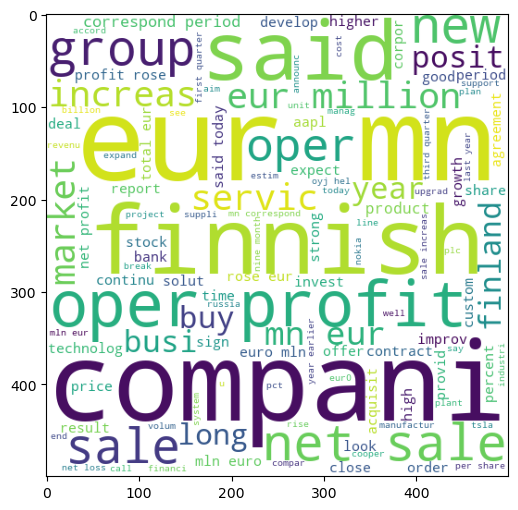

In [42]:
positive_wc=wc.generate(df[df['Sentiment']==2]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(positive_wc)

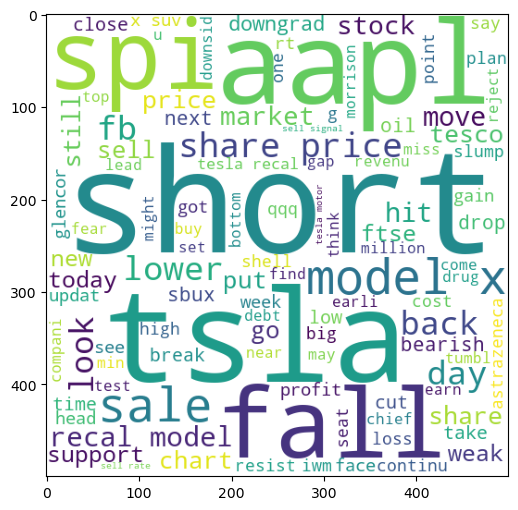

In [43]:
negative_wc=wc.generate(df[df['Sentiment']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(negative_wc)

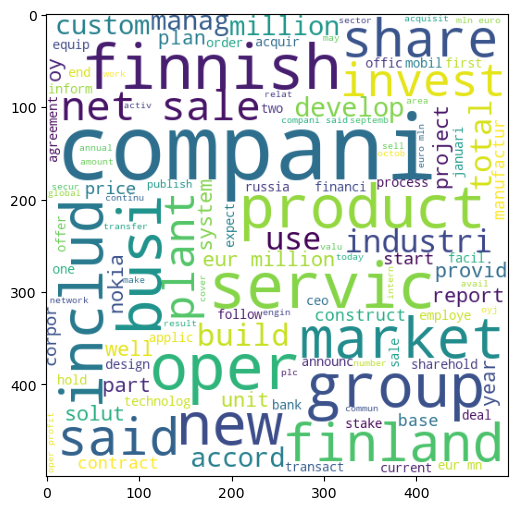

In [44]:
neutral_wc=wc.generate(df[df['Sentiment']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(neutral_wc)

In [45]:
df.head()

,Sentence,Sentiment,num_characters,num_words,num_sentence,transformed_text
0,The GeoSolutions technology will leverage Bene...,2,218,32,1,geosolut technolog leverag benefon gp solut pr...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,55,15,1,esi low bk real possibl
2,"For the last quarter of 2010 , Componenta 's n...",2,193,39,1,last quarter 2010 componenta net sale doubl eu...
3,According to the Finnish-Russian Chamber of Co...,1,128,20,1,accord chamber commerc major construct compani...
4,The Swedish buyout firm has sold its remaining...,1,135,23,1,swedish buyout firm sold remain percent stake ...


In [46]:
positive_corpus = []
for sentence in df[df['Sentiment']==2]['transformed_text'].tolist():
    for word in sentence.split():
        positive_corpus.append(word)
        
   

In [47]:
len(positive_corpus)

21114

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


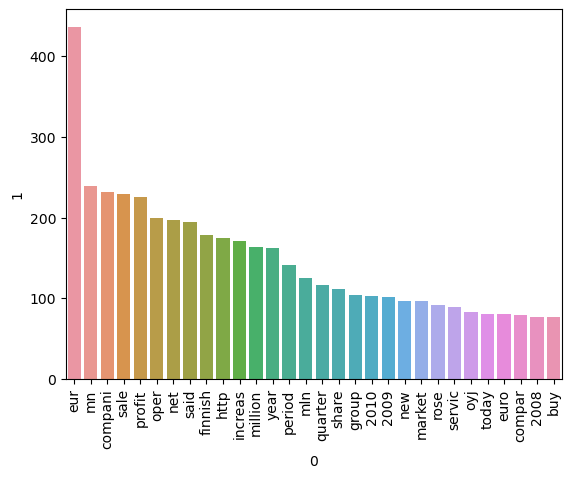

In [48]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(positive_corpus).most_common(30))[0],pd.DataFrame(Counter(positive_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()
            

In [49]:
negative_corpus = []
for sentence in df[df['Sentiment']==0]['transformed_text'].tolist():
    for word in sentence.split():
        negative_corpus.append(word)

In [50]:
len(negative_corpus)

2937

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


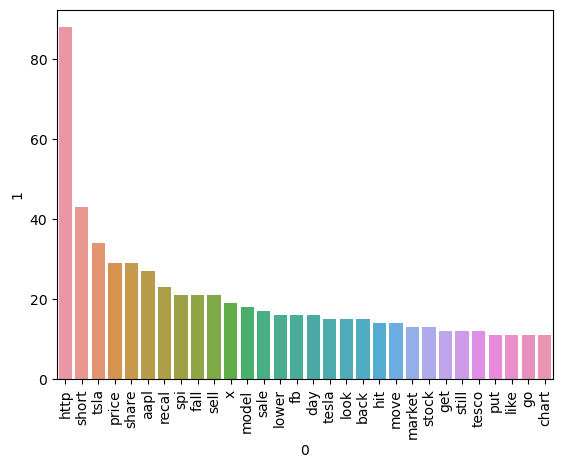

In [51]:
sns.barplot(pd.DataFrame(Counter(negative_corpus).most_common(30))[0],pd.DataFrame(Counter(negative_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
neutral_corpus = []
for sentence in df[df['Sentiment']==1]['transformed_text'].tolist():
    for word in sentence.split():
        neutral_corpus.append(word)

In [53]:
len(neutral_corpus)

30348

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


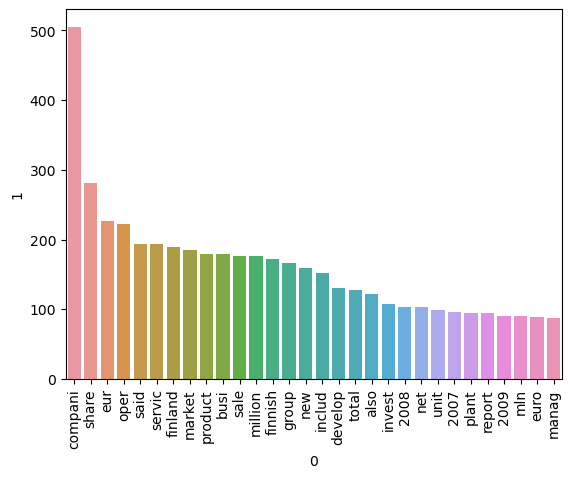

In [54]:
sns.barplot(pd.DataFrame(Counter(neutral_corpus).most_common(30))[0],pd.DataFrame(Counter(neutral_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

In [55]:
#model improve


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=2000,ngram_range=(1,2))

In [57]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(4802, 2000)

In [59]:
y=df['Sentiment'].values

In [60]:
y

array([2, 0, 2, ..., 1, 1, 2])

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [62]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1,C=1)
svc.fit(X_train, y_train)
y_pred4 = svc.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred4))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred4))
print('Classification Report:')
print(classification_report(y_test, y_pred4))

Accuracy Score
0.7835587929240374
Confusion Matrix:
[[ 32  13  18]
 [  4 460  75]
 [  8  90 261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.51      0.60        63
           1       0.82      0.85      0.83       539
           2       0.74      0.73      0.73       359

    accuracy                           0.78       961
   macro avg       0.76      0.70      0.72       961
weighted avg       0.78      0.78      0.78       961



In [63]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=1,gamma=1)
svc.fit(X_train, y_train)
y_pred4 = svc.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred4))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred4))
print('Classification Report:')
print(classification_report(y_test, y_pred4))

Accuracy Score
0.7814776274713839
Confusion Matrix:
[[ 33  13  17]
 [  4 457  78]
 [  9  89 261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.52      0.61        63
           1       0.82      0.85      0.83       539
           2       0.73      0.73      0.73       359

    accuracy                           0.78       961
   macro avg       0.76      0.70      0.72       961
weighted avg       0.78      0.78      0.78       961



In [64]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred2))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred2))
print('Classification Report:')
print(classification_report(y_test, y_pred2))


Accuracy Score
0.7658688865764828
Confusion Matrix:
[[ 18  12  33]
 [  1 475  63]
 [  1 115 243]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.29      0.43        63
           1       0.79      0.88      0.83       539
           2       0.72      0.68      0.70       359

    accuracy                           0.77       961
   macro avg       0.80      0.61      0.65       961
weighted avg       0.77      0.77      0.76       961



In [65]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=0.5)
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred2))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred2))
print('Classification Report:')
print(classification_report(y_test, y_pred2))

Accuracy Score
0.7700312174817898
Confusion Matrix:
[[ 29  11  23]
 [  5 468  66]
 [  7 109 243]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.46      0.56        63
           1       0.80      0.87      0.83       539
           2       0.73      0.68      0.70       359

    accuracy                           0.77       961
   macro avg       0.75      0.67      0.70       961
weighted avg       0.77      0.77      0.77       961



In [66]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred2))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred2))
print('Classification Report:')
print(classification_report(y_test, y_pred2))

Accuracy Score
0.7658688865764828
Confusion Matrix:
[[ 18  12  33]
 [  1 475  63]
 [  1 115 243]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.29      0.43        63
           1       0.79      0.88      0.83       539
           2       0.72      0.68      0.70       359

    accuracy                           0.77       961
   macro avg       0.80      0.61      0.65       961
weighted avg       0.77      0.77      0.76       961



In [67]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=2.0)
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred2))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred2))
print('Classification Report:')
print(classification_report(y_test, y_pred2))

Accuracy Score
0.7554630593132154
Confusion Matrix:
[[  7  15  41]
 [  0 482  57]
 [  0 122 237]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        63
           1       0.78      0.89      0.83       539
           2       0.71      0.66      0.68       359

    accuracy                           0.76       961
   macro avg       0.83      0.56      0.57       961
weighted avg       0.77      0.76      0.74       961



In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred2))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred2))
print('Classification Report:')
print(classification_report(y_test, y_pred2))

Accuracy Score
0.7554630593132154
Confusion Matrix:
[[  7  15  41]
 [  0 482  57]
 [  0 122 237]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        63
           1       0.78      0.89      0.83       539
           2       0.71      0.66      0.68       359

    accuracy                           0.76       961
   macro avg       0.83      0.56      0.57       961
weighted avg       0.77      0.76      0.74       961



In [69]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l2',C=1.0)
lrc.fit(X_train, y_train)
y_pred7 = lrc.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred7))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred7))
print('Classification Report:')
print(classification_report(y_test, y_pred7))

Accuracy Score
0.7679500520291364
Confusion Matrix:
[[ 19  22  22]
 [  0 487  52]
 [  3 124 232]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.30      0.45        63
           1       0.77      0.90      0.83       539
           2       0.76      0.65      0.70       359

    accuracy                           0.77       961
   macro avg       0.80      0.62      0.66       961
weighted avg       0.77      0.77      0.76       961



In [70]:
from numpy.random import uniform
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=9,weights=uniform,algorithm='brute')
knc.fit(X_train, y_train)
y_pred8 = knc.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred8))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred8))
print('Classification Report:')
print(classification_report(y_test, y_pred8))

Accuracy Score
0.7013527575442248
Confusion Matrix:
[[ 22  23  18]
 [  4 482  53]
 [ 15 174 170]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.35      0.42        63
           1       0.71      0.89      0.79       539
           2       0.71      0.47      0.57       359

    accuracy                           0.70       961
   macro avg       0.65      0.57      0.59       961
weighted avg       0.70      0.70      0.68       961



In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred5 = dtc.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred5))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred5))
print('Classification Report:')
print(classification_report(y_test, y_pred5))

Accuracy Score
0.6524453694068678
Confusion Matrix:
[[ 14  40   9]
 [  0 527  12]
 [  4 269  86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.22      0.35        63
           1       0.63      0.98      0.77       539
           2       0.80      0.24      0.37       359

    accuracy                           0.65       961
   macro avg       0.74      0.48      0.49       961
weighted avg       0.70      0.65      0.59       961



In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred5 = dtc.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred5))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred5))
print('Classification Report:')
print(classification_report(y_test, y_pred5))

Accuracy Score
0.7075962539021852
Confusion Matrix:
[[ 31  10  22]
 [ 11 409 119]
 [ 23  96 240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48        63
           1       0.79      0.76      0.78       539
           2       0.63      0.67      0.65       359

    accuracy                           0.71       961
   macro avg       0.63      0.64      0.64       961
weighted avg       0.71      0.71      0.71       961



In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,class_weight={0: 0.0159, 1: 0.0019, 2: 0.0028}, random_state=42)
rfc.fit(X_train, y_train)
y_pred6 = rfc.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred6))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred6))
print('Classification Report:')
print(classification_report(y_test, y_pred6))

Accuracy Score
0.7929240374609782
Confusion Matrix:
[[ 37   9  17]
 [  9 483  47]
 [ 10 107 242]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.59      0.62        63
           1       0.81      0.90      0.85       539
           2       0.79      0.67      0.73       359

    accuracy                           0.79       961
   macro avg       0.75      0.72      0.73       961
weighted avg       0.79      0.79      0.79       961



In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
rfc.fit(X_train, y_train)
y_pred6 = rfc.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred6))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred6))
print('Classification Report:')
print(classification_report(y_test, y_pred6))

Accuracy Score
0.7950052029136316
Confusion Matrix:
[[ 33   9  21]
 [ 11 481  47]
 [  5 104 250]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.52      0.59        63
           1       0.81      0.89      0.85       539
           2       0.79      0.70      0.74       359

    accuracy                           0.80       961
   macro avg       0.76      0.70      0.73       961
weighted avg       0.79      0.80      0.79       961



In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
y_pred6 = rfc.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred6))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred6))
print('Classification Report:')
print(classification_report(y_test, y_pred6))

Accuracy Score
0.7960457856399584
Confusion Matrix:
[[ 29   9  25]
 [  5 476  58]
 [  3  96 260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.46      0.58        63
           1       0.82      0.88      0.85       539
           2       0.76      0.72      0.74       359

    accuracy                           0.80       961
   macro avg       0.79      0.69      0.72       961
weighted avg       0.79      0.80      0.79       961



In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
xgb.fit(X_train, y_train)
y_pred6 = xgb.predict(X_test)
print('Accuracy Score')
print(accuracy_score(y_test, y_pred6))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred6))
print('Classification Report:')
print(classification_report(y_test, y_pred6))

Accuracy Score
0.777315296566077
Confusion Matrix:
[[ 20  24  19]
 [  1 499  39]
 [  6 125 228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.32      0.44        63
           1       0.77      0.93      0.84       539
           2       0.80      0.64      0.71       359

    accuracy                           0.78       961
   macro avg       0.77      0.63      0.66       961
weighted avg       0.78      0.78      0.76       961



# Model Deployment

In [80]:
rfc = RandomForestClassifier(n_estimators=100,class_weight={0: 0.0159, 1: 0.0019, 2: 0.0028}, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.0159, 1: 0.0019, 2: 0.0028},
                       random_state=42)

In [79]:
import pickle

In [88]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

In [89]:
pickle.dump(rfc , open('rfc.pkl', 'wb'))

In [90]:
pickled_model = pickle.load(open('rfc.pkl', 'rb'))
pickled_model.predict(X_test)

array([2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1,

In [ ]:
data.to_csv('data.csv')